# 🛒 Retail Revenue Optimization & Category Performance Analysis

This project explores key retail performance indicators using transactional data from multiple U.S. cities and states. The objective is to uncover actionable insights in sales, category profitability, discount strategies, and geographic patterns — helping inventory and merchandising analysts make smarter decisions.

### Key Areas Explored:
- **Profitability Trends**: Analyzed average profit margins across sub-categories to identify high-margin and loss-leading product lines.
- **Discount Effectiveness**: Studied how varying discount levels affect profit across categories.
- **Customer Segments**: Assessed which segments (e.g., Corporate, Consumer, Home Office) drive the most revenue.
- **Geographic Intelligence**: Identified the best and worst-selling products by state and evaluated category-level sales across top-performing cities.

> This notebook is designed for business analysts, replenishment planners, and category managers looking to optimize sales strategies and improve profit margins.















In [3]:
import pandas as pd

# Load Excel file from Colab upload path
df = pd.read_excel('/content/Retail-Supply-Chain-Sales-Dataset.xlsx', sheet_name='Retails Order Full Dataset')

# View a sample
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 23)

### 🧹 Data Cleaning & Initial Checks

Before analysis, it's important to review and clean the dataset. This step identifies missing values, incorrect data types, and duplicate rows that could affect accuracy.

In [6]:
# Check for missing/null values
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
# See the data types for each column
df.dtypes


,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [8]:
# Check duplicate records
df.duplicated().sum()

np.int64(0)

In [9]:
# Quick numeric stats
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Row ID,9994.0,NaN,NaN,NaN,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,NaN,NaN,NaN,2016-04-11 07:17:44.078447104,2014-01-02 00:00:00,2015-05-01 00:00:00,2016-05-30 00:00:00,2017-04-09 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,NaN,NaN,NaN,2016-05-15 21:54:47.332399360,2014-01-15 00:00:00,2015-06-20 00:00:00,2016-07-21 00:00:00,2017-06-02 00:00:00,2018-05-01 00:00:00,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9994,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 💼 Average Profit Margin by Sub-Category

This analysis highlights which sub-categories offer the highest average profit margins. These are high-value segments that may deserve increased attention in inventory allocation, upselling strategy, or promotion design. High-margin products help boost revenue without needing to increase sales volume.

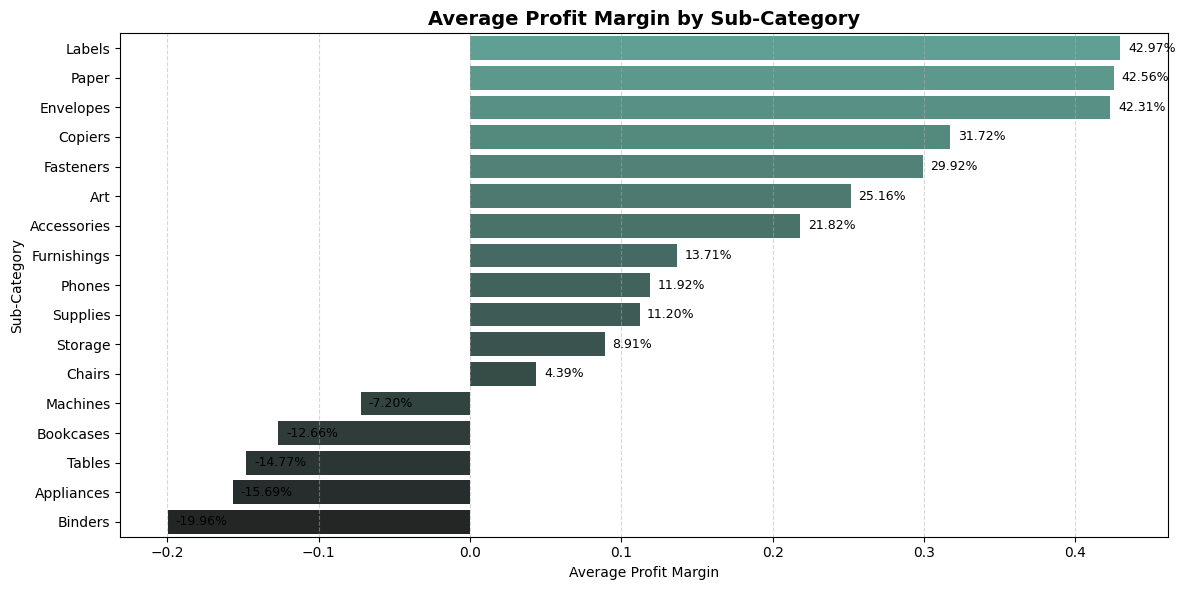

In [13]:
# Calculate Profit Margin for each row
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Group by Sub-Category and calculate average profit margin
subcat_margin = df.groupby('Sub-Category')['Profit_Margin'].mean().sort_values(ascending=False)

# Plot Margin Anlysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
colors = sns.color_palette("dark:#5A9_r", len(subcat_margin))

sns.barplot(x=subcat_margin.values, y=subcat_margin.index, hue=subcat_margin.index, palette=colors, legend=False)
plt.title('Average Profit Margin by Sub-Category', fontsize=14, weight='bold')
plt.xlabel('Average Profit Margin')
plt.ylabel('Sub-Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add margin labels
for i, value in enumerate(subcat_margin.values):
    plt.text(value + 0.005, i, f"{value:.2%}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


**Some Insights**:
This visualization highlights the average profit margin across different product sub-categories. Key insights include:

- High-margin sub-categories like Labels (42.97%), Paper (42.56%), and Envelopes (42.31%) generate the most profit per sale. These should be prioritized in pricing and promotional strategies.

- Low to negative margin categories such as Binders (-19.96%), Appliances (-15.69%), and Tables (-14.77%) signal possible over-discounting, supply chain issues, or pricing misalignment.

- These trends help identify which product lines may be draining profits and which ones offer the best return on investment for marketing, replenishment, and shelf space.

### 📉 Discount vs. Profit Analysis

This chart explores the relationship between discount rates and profit margins across product categories. Each point represents a transaction, with colors indicating different categories.

- A red dashed line at y = 0 separates profitable and loss-making orders.
- Helps assess whether discounts are strategically driving volume or eroding profit margins.



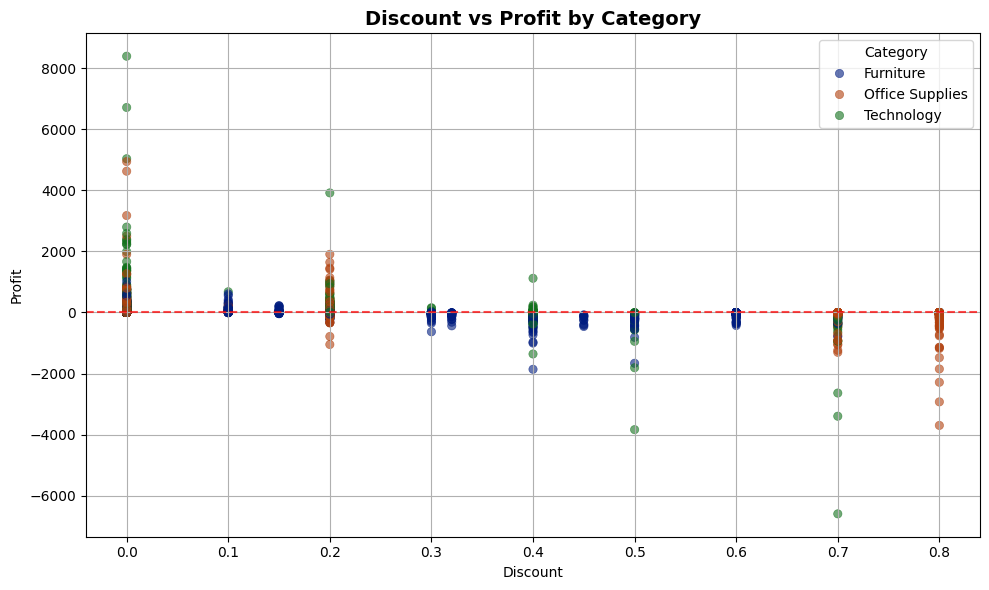

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6, hue='Category', palette='dark', edgecolor=None)

plt.title('Discount vs Profit by Category', fontsize=14, weight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, linestyle='--', color='red', alpha=0.7)  # Show profit threshold
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretation: High discount rates (above 40%) are often associated with negative profits, especially in the Office Supplies and Technology categories.

- Most loss-making orders appear clustered near 0.5 to 0.8 discount range.
- Furniture items show relatively moderate profit loss compared to other categories.
- The red line at y=0 highlights how excessive discounting can push transactions into the loss zone.

Insight: Strategic discounting is necessary—deep discounts can erode profitability unless compensated by volume or vendor subsidies.


### 🧮 Segment-Level Performance
This chart highlights the total sales generated by each customer segment. Understanding which segment contributes most to revenue helps retailers make informed decisions on targeted promotions, service enhancements, and inventory allocation.

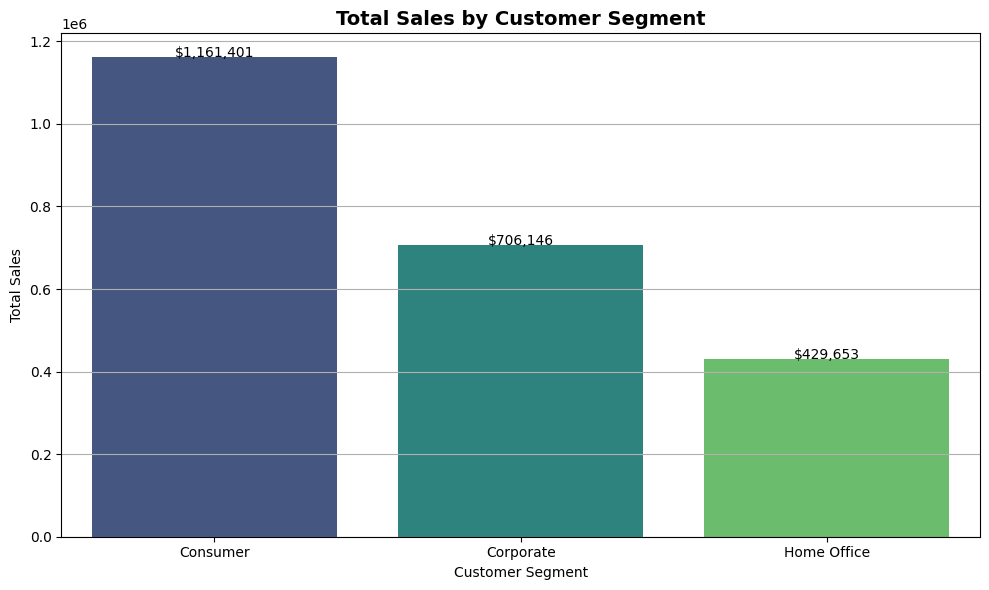

In [18]:
# Group data by Segment
segment_perf = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False).reset_index()

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=segment_perf, x='Segment', y='Sales', hue='Segment', palette='viridis', legend=False)

# Add labels
for i, row in segment_perf.iterrows():
    plt.text(i, row['Sales'] + 1000, f"${row['Sales']:,.0f}", ha='center', fontsize=10)

plt.title('Total Sales by Customer Segment', fontsize=14, weight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Interpretation:
The Consumer segment accounts for the largest portion of total sales ($1.16M), followed by Corporate ($706K), and Home Office (~$430K). This highlights Consumer as the most valuable customer segment in terms of revenue contribution, suggesting that marketing and retention efforts may yield the highest ROI when focused here.

### Top vs Bottom Product Sales by State
This visualization highlights the top-performing and underperforming products for the top 10 U.S. states based on total sales.

- Each horizontal bar represents a state, with labels indicating both the best-selling and worst-selling product.

- Green bars show the highest revenue-generating product in each state, while red bars represent the lowest-selling product.

- This analysis can guide targeted promotions, restocking strategies, and help identify inventory inefficiencies on a state-level basis.

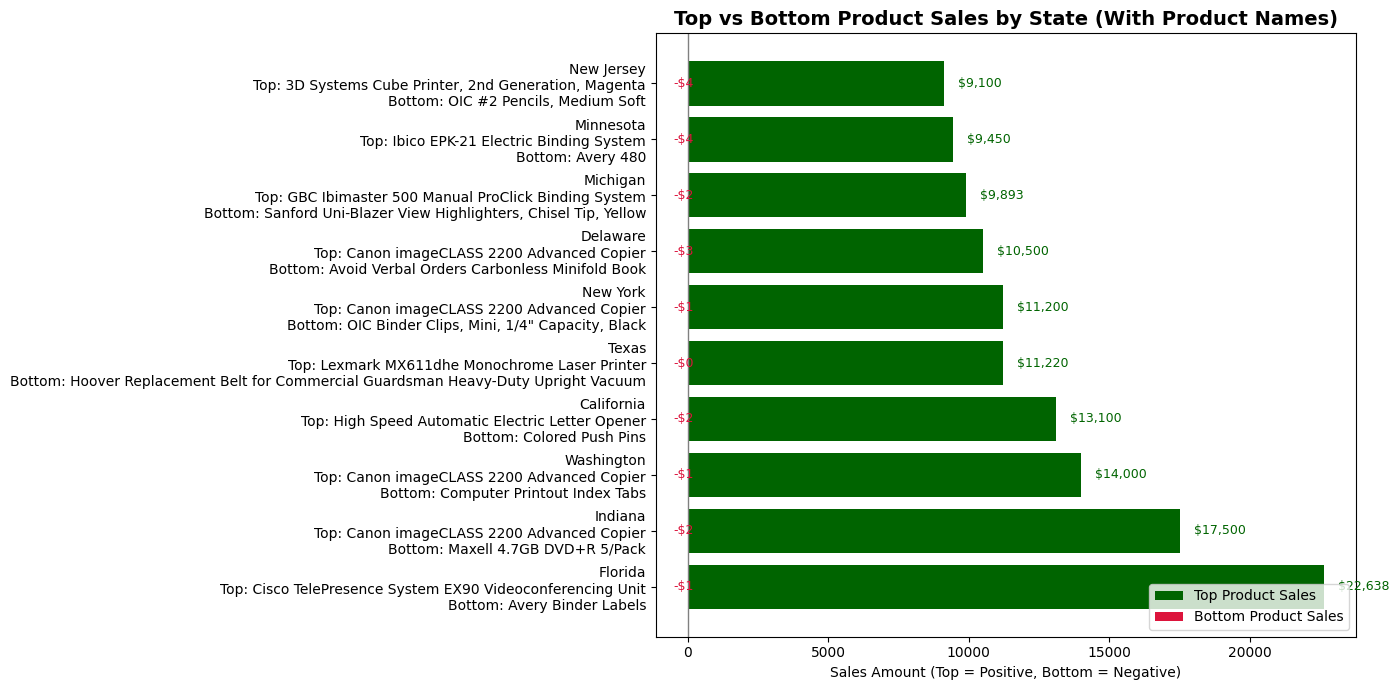

In [23]:
# Group by State and Product Name
product_state_sales = df.groupby(['State', 'Product Name'])['Sales'].sum().reset_index()

# Get top and bottom product per state
top_products = product_state_sales.loc[product_state_sales.groupby('State')['Sales'].idxmax()].reset_index(drop=True)
bottom_products = product_state_sales.loc[product_state_sales.groupby('State')['Sales'].idxmin()].reset_index(drop=True)

# Merge for comparison
product_extremes = pd.merge(top_products, bottom_products, on='State', suffixes=('_Top', '_Bottom'))

# Get top 10 states by top product sales
top_states = product_extremes.sort_values(by='Sales_Top', ascending=False).head(10)

# Create labels combining State with Product Names for both Top and Bottom
top_states['Label'] = top_states['State'] + "\nTop: " + top_states['Product Name_Top'] + "\nBottom: " + top_states['Product Name_Bottom']

# Plot again with new labels
plt.figure(figsize=(14, 7))
plt.barh(top_states['Label'], top_states['Sales_Top'], color='darkgreen', label='Top Product Sales')
plt.barh(top_states['Label'], -top_states['Sales_Bottom'], color='crimson', label='Bottom Product Sales')

# Add value labels
for i, value in enumerate(top_states['Sales_Top']):
    plt.text(value + 500, i, f"${value:,.0f}", va='center', fontsize=9, color='darkgreen')
for i, value in enumerate(top_states['Sales_Bottom']):
    plt.text(-value - 500, i, f"-${value:,.0f}", va='center', fontsize=9, color='crimson')

plt.title('Top vs Bottom Product Sales by State (With Product Names)', fontsize=14, weight='bold')
plt.xlabel('Sales Amount (Top = Positive, Bottom = Negative)')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


Chart Interpretation: This bar chart highlights the best- and worst-selling products across the top 10 U.S. states by sales:

- Each horizontal bar pair compares the top-grossing product (green bar) against the lowest-performing product (red bar) for that specific state.

- The product names are clearly labeled, helping businesses pinpoint exactly which SKUs are driving revenue and which ones may be dragging down margins.

- For example:

   - In Florida, the Cisco TelePresence System EX90 was a major success, while Avery Binder Labels struggled significantly.

   - In California, the High Speed Electric Letter Opener outperformed others, while Colored Push Pins underwhelmed.

   - Canon imageCLASS 2200 Advanced Copier appeared multiple times as a top seller, suggesting it's a reliably high-performing SKU across regions.

### 🏙️ Category Performance by City

This horizontal bar chart visualizes total sales by product category for top-performing cities. It reveals geographic strengths in demand and informs regional category-level planning for merchandising and marketing strategies.


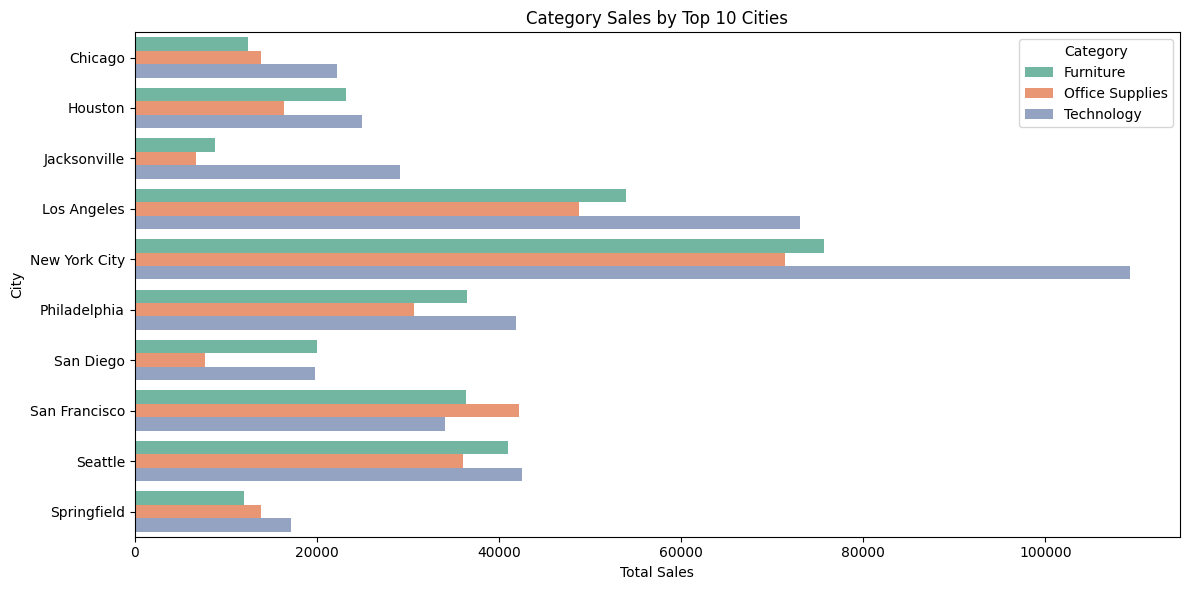

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by City and Category
city_category_sales = df.groupby(['City', 'Category'])['Sales'].sum().reset_index()

# Focus on top 10 cities by overall sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).index
filtered_data = city_category_sales[city_category_sales['City'].isin(top_cities)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Sales', y='City', hue='Category', palette='Set2')
plt.title('Category Sales by Top 10 Cities')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

Chart Interpretation:
This grouped bar chart presents a breakdown of Furniture, Office Supplies, and Technology sales across the top 10 revenue-generating cities:

- New York City dominates across all categories, with Technology sales nearing $110,000 — the highest single-category contribution in the dataset.

- Los Angeles also performs strongly across all categories, especially in Technology and Furniture.

- Seattle and San Francisco show balanced sales distribution, making them promising markets for all categories.

- Cities like Jacksonville, San Diego, and Springfield have lower overall sales, suggesting potential opportunities for local growth strategies.

# 📊 Executive Summary

This analysis reveals meaningful patterns in product performance, profit contribution, and customer behavior across regions:

- 🔹 **Profit Margin Trends**: Products in the *Labels*, *Paper*, and *Envelopes* sub-categories deliver over **40% average margins**, while *Binders* and *Appliances* result in losses — key focus areas for margin optimization.

- 🔹 **Discount vs. Profit**: High discount levels (30%+) often lead to negative profit, especially in *Technology* and *Furniture*. A targeted discounting strategy is needed to protect margins.

- 🔹 **Customer Segment Insights**: The *Consumer* segment contributes over **$1.1M** in sales — more than double that of *Home Office* — confirming it as the top revenue-generating segment.

- 🔹 **Product Winners and Losers by State**: Items like *Canon imageCLASS Copiers* and *Cisco TelePresence Systems* are state-level top performers, while low-cost office supplies like *Labels* and *Push Pins* frequently underperform.

- 🔹 **City-Level Category Performance**: *New York City*, *Los Angeles*, and *Seattle* lead in total sales across all categories, with *Technology* consistently dominating — supporting regional category prioritization.

> ✅ **Business Takeaway:** To improve revenue and margin, focus on high-performing products in top cities and customer segments. Avoid blanket discounts, and evaluate underperforming SKUs for potential phase-out or re-pricing.

This notebook provides a foundation for inventory strategy, revenue optimization, and geography-based planning for retail decision-makers.
